# Crecimiento de poblaciones, modelo de Lotka-Volterra

El modelo  de Lotka-Volterra consiste en un sistema de dos ecuaciones diferenciales de primer orden, que se usan para describir dinámicas de sistemas biológicos en el que dos especies interactúan, una como presa y otra como depredador, las cuales son:

*Ecuacion para la poblacion de presas:
$$\dfrac{dp}{dt}=r_{1}P-a_{1}PD$$

*Ecuacion para la poblacion de los depredadores:
$$\dfrac{dD}{dt}=a_{2}PD-r_{2}D$$

Donde 𝐷 es el número de depredadores, 𝑃 es el número de presas y los parámetros son constantes positivas que representan:  
𝑟1: tasa de crecimiento de las presas. 
 𝑎1: éxito en la caza del depredador. 
 𝑟2: tasa de crecimiento de los depredadores.  
𝑎2: éxito del escape, que afecta al depredador.

El crecimiento de 𝐷, en ausencia de 𝑃 sería negativo, proporcional a 𝐷, −𝑟2𝐷, dado que 𝑃 es la fuente de alimento de 𝐷. Sin embargo en presencia de P, el número de contactos de 𝐷 con 𝑃 aumenta el crecimiento de 𝐷, proporcional a 𝑃. 

Ahora graficaremos el modelo con las paqueterias ya mencionadas en el trabajo de investigacion.


$$F(p,D) = [r_{1}P-a_{1}, a_{2}PD-r_{2}] $$

In [1]:
from scipy.integrate import* #Importamos las paqueterias necesarias para la integracion numerica 
import numpy as np 
import matplotlib.pyplot as plt #Importamos la paqueteria necesaria para graficar las funciones 

In [4]:
?odeint

In [2]:
def lotka_volterra (y,t,para): #Definimos la funcion y la estructura que debe de tener 
    """La funcion que ingresa es con y siendo un array como vector al igual que t y los argumentos como una dupla ... y lo que regresa la funcion es la derivada de las presas respecto del tiempo y la derivada de depredadores respecto del tiempo"""
    """Donde x0=x; x1=y; x2=z; y los argumentos son para0=r1; para1=a1; para2=r1; para3=a2"""
    dp = para[0]*y[0]-(para[1]*y[0]*y[1]) #Estructuramos la derivada de las presas 
    dD = para[3]*y[0]*y[1]-(para[2]*y[1]) #Estructuramos la derivada de los depredadores con el sistema Lotka-Volterra 
    return [dp,dD]

In [3]:
t = np.linspace(0, 100, 1001) #Indicamos los parametros del tiempo 

In [4]:
t

array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])

In [5]:
lotka_volterra ([30, 4], t, [0.8, 0.4, 0.023, 0.018]) #Prueba de el sistema de ecuaciones con sus condiciones iniciales, resuelto solo con numeros 

[-24.0, 2.0679999999999996]

In [7]:
sol = odeint(lotka_volterra, [.9, .9], t, args=([2/3, 4/3, 1, 1],)) #Esta es una prueba para obeservar el comportamiento del modelo 

In [8]:
sol #Aqui estan las soluciones 

array([[0.9       , 0.9       ],
       [0.85384766, 0.88896347],
       [0.81146204, 0.87418319],
       ...,
       [1.14403721, 0.24371173],
       [1.18350281, 0.24773437],
       [1.22358699, 0.25282746]])

In [9]:
sol[:,0] #Aqui estan las soluciones solo de las presas 

array([0.9       , 0.85384766, 0.81146204, ..., 1.14403721, 1.18350281,
       1.22358699])

In [10]:
sol[:,1] #Aqui estan las soluciones solo de los depredadores 

array([0.9       , 0.88896347, 0.87418319, ..., 0.24371173, 0.24773437,
       0.25282746])

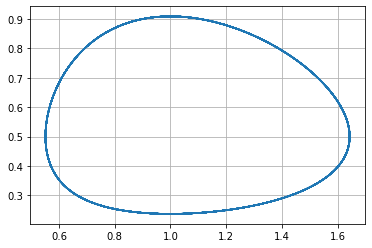

In [11]:
plt.plot(sol[:,0], sol[:,1]) #Aqui llamamos a la paqueteria de las graficas donde sol[:,0] es el eje de las X y sol[:,1] es el eje de las Y 
plt.grid() #Crea las cuadriculas de la grafica 

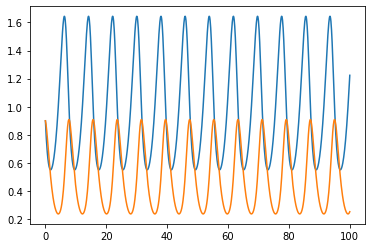

In [12]:
    """Aqui graficaremos el comportamiento oscilatorio con el que se comprueba el modelo Lotka-Volterra con las soluciones del sistema de ecuaciones vs el tiempo """
plt.plot(t, sol[:,0]) 
plt.plot(t, sol[:,1])

Ahora graficaremos el modelo de Lotka-Volterra con los valores obtenidos del estudio de Hudson Bay;para esto usaremos los siguientes valores en los parametros:  $$a_{1}=0.4 , a_{2}=0.018 , r_{1}= 0.8 , r_{2}=0.023 , x(0)= 30, y (0)=4$$


In [14]:
sol1 = odeint(lotka_volterra, [.3, 0.04], t, args=([0.8, 0.4, 0.023, 0.018],)) #Aqui ingresamos los valores iniciales del estudio de conejos como presas y linces como depredadores 

In [15]:
sol1

array([[ 3.00000000e-01,  4.00000000e-02],
       [ 3.24467009e-01,  3.99305297e-02],
       [ 3.50930429e-01,  3.98630063e-02],
       ...,
       [-2.82540195e-10,  1.45554498e+00],
       [-2.97637656e-10,  1.45220108e+00],
       [-3.13286482e-10,  1.44886485e+00]])

In [16]:
sol1[:,0]#Aqui indicamos el resultado de los conejos en sus condiciones iniciales 

array([ 3.00000000e-01,  3.24467009e-01,  3.50930429e-01, ...,
       -2.82540195e-10, -2.97637656e-10, -3.13286482e-10])

In [17]:
sol1[:,1]#Aqui indicamos el resultado de los linces en sus condiciones inicales 

array([0.04      , 0.03993053, 0.03986301, ..., 1.45554498, 1.45220108,
       1.44886485])

In [18]:
sol2 = odeint(lotka_volterra, [.472, 0.061], t, args=([0.8, 0.4, 0.023, 0.018],))#A partir de aqui ingresamos las condiciones que indican el estudio de referencia 

In [19]:
sol2

array([[4.72000000e-01, 6.10000000e-02],
       [5.10066300e-01, 6.09136496e-02],
       [5.51204465e-01, 6.08317554e-02],
       ...,
       [2.81563624e-08, 1.31055828e+00],
       [2.89501265e-08, 1.30754746e+00],
       [2.97701694e-08, 1.30454355e+00]])

In [20]:
sol2[:,0]

array([4.72000000e-01, 5.10066300e-01, 5.51204465e-01, ...,
       2.81563624e-08, 2.89501265e-08, 2.97701694e-08])

In [21]:
sol2[:,1]

array([0.061     , 0.06091365, 0.06083176, ..., 1.31055828, 1.30754746,
       1.30454355])

In [22]:
sol3 = odeint(lotka_volterra, [.702, 0.098], t, args=([0.8, 0.4, 0.023, 0.018],))

In [23]:
sol3

array([[ 7.02000000e-01,  9.80000000e-02],
       [ 7.57493807e-01,  9.79033130e-02],
       [ 8.17377455e-01,  9.78168732e-02],
       ...,
       [-2.37617708e-08,  1.15611491e+00],
       [-2.45779530e-08,  1.15345890e+00],
       [-2.54257144e-08,  1.15080899e+00]])

In [24]:
sol3[:,0]

array([ 7.02000000e-01,  7.57493807e-01,  8.17377455e-01, ...,
       -2.37617708e-08, -2.45779530e-08, -2.54257144e-08])

In [25]:
sol3[:,1]

array([0.098     , 0.09790331, 0.09781687, ..., 1.15611491, 1.1534589 ,
       1.15080899])

In [26]:
sol4 = odeint(lotka_volterra, [.774, 0.352], t, args=([0.8, 0.4, 0.023, 0.018],))

In [27]:
sol4

array([[7.74000000e-01, 3.52000000e-01],
       [8.26746425e-01, 3.51697462e-01],
       [8.83097490e-01, 3.51429677e-01],
       ...,
       [2.16014995e-05, 7.85799535e-01],
       [2.26773993e-05, 7.83994305e-01],
       [2.38085146e-05, 7.82193223e-01]])

In [28]:
sol4[:,0]

array([7.74000000e-01, 8.26746425e-01, 8.83097490e-01, ...,
       2.16014995e-05, 2.26773993e-05, 2.38085146e-05])

In [29]:
sol4[:,1]

array([0.352     , 0.35169746, 0.35142968, ..., 0.78579954, 0.7839943 ,
       0.78219322])

In [30]:
sol5 = odeint(lotka_volterra, [.363, 0.594], t, args=([0.8, 0.4, 0.023, 0.018],))

In [31]:
sol5[:,0]

array([0.363     , 0.38400755, 0.40624637, ..., 0.01907611, 0.0201205 ,
       0.02122335])

In [32]:
sol5[:,1]

array([0.594     , 0.59303383, 0.59209227, ..., 0.66819632, 0.66668475,
       0.66517788])

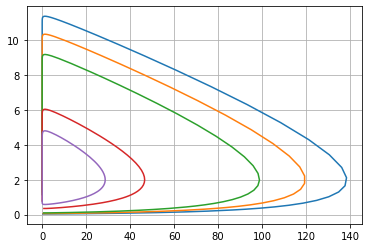

In [33]:
"""Aqui graficaremos todas nuestras soluciones para observar el comportamiento del modelo a lo largo del tiempo"""
plt.plot(sol1[:,0], sol1[:,1], sol2[:,0],sol2[:,1], sol3[:,0], sol3[:,1], sol4[:,0], sol4[:,1], sol5[:,0], sol5[:,1])
plt.grid()

Cabe mencionar que el fin de esta invetigacion es demostrar que el modelo de Lotka- Volterra nos podria ayudar a intervenir justo a tiempo para salvar a una especie que esté al borde de la extinción, por diferentes factores. Pero tambien cómo afectaría al resto del ambiente donde se desarrollaba, de esta manera, reconocer la relación que hay entre especies, tanto de fauna como de flora, pues todos estos están involucrados en un ciclo que trae un equilibrio.
Asi que ahora graficaremos el modelo de Lotka-Volterra, para demostrar que es lo que sucederia si una de las especies, ya sea el depredador o la presa despareciera.

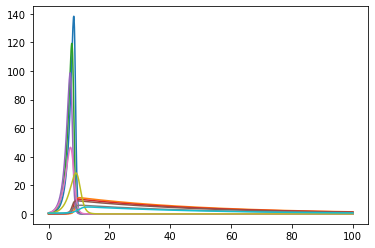

In [34]:
"""Aqui graficaremos todas nuestras soluciones para observar el comportamiento oscilatorio y la relacion presa- depredador de los conejos siendo el eje X y los linces siendo el eje Y"""
plt.plot(t, sol1[:,0])
plt.plot(t, sol1[:,1])
plt.plot(t, sol2[:,0])
plt.plot(t, sol2[:,1])
plt.plot(t, sol3[:,0])
plt.plot(t, sol3[:,1])
plt.plot(t, sol4[:,0])
plt.plot(t, sol4[:,1])
plt.plot(t, sol5[:,0])
plt.plot(t, sol5[:,1])